# SET 1

## Q1


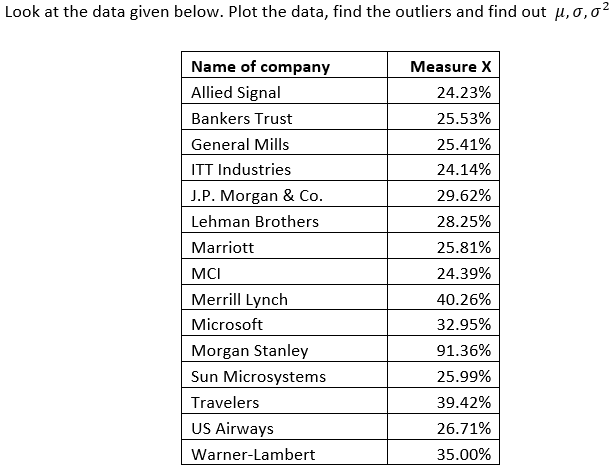

In [1]:
import warnings
warnings.filterwarnings('ignore')

    Name of company  Measure X
0     Allied Signal     0.2423
1     Bankers Trust     0.2553
2     General Mills     0.2541
3    ITT Industries     0.2414
4  J.P.Morgan & Co.     0.2962

Mean
 Measure X    0.332713
dtype: float64

Standard Deviation
 Measure X    0.169454
dtype: float64

Variance
 Measure X    0.028715
dtype: float64


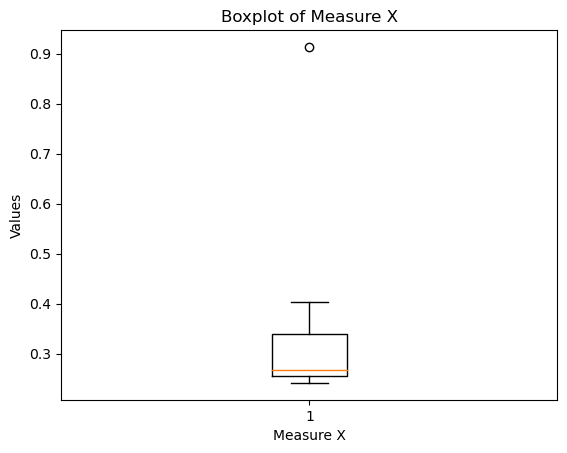

In [2]:
import pandas as pd, matplotlib.pyplot as plt

q1 = pd.read_excel("Q1.xlsx")
print(q1.head())
print("\nMean\n",q1.mean())
print("\nStandard Deviation\n",q1.std())
print("\nVariance\n",q1.var())

# to plot the data and find the outliers 
plt.boxplot(q1['Measure X'])
plt.title("Boxplot of Measure X")
plt.xlabel("Measure X")
plt.ylabel("Values")
plt.show()

# SET 2

## Q1

    The time required for servicing transmissions is normally distributed with μ = 45 minutes and σ = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 
    A.	0.3875   
    B.	0.2676   
    C.	0.5   
    D.	0.6987 

In [3]:
from scipy import stats
# P(X>50)
print("Probability that the service manager cannot meet his commitment - \n",
      1 - stats.norm.cdf(50,loc=45,scale=8))

Probability that the service manager cannot meet his commitment - 
 0.26598552904870054


 ## Q2
 
    The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean μ = 38 and Standard deviation σ =6. For each statement below, please specify True/False. If false, briefly explain why.
    
    A). More employees at the processing center are older than 44 than between 38 and 44.
    
    B). A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.
 
 
 
 ### A

In [4]:
from scipy import stats
# P(X>44)
print("P(age>44) - ",(1 - stats.norm.cdf(44,loc=38,scale=6))*400)
# P(38<X<44)
print("P(38<age<44) - ",(stats.norm.cdf(44,38,6) - stats.norm.cdf(38,38,6))*400)

P(age>44) -  63.46210157258283
P(38<age<44) -  136.53789842741716


### B

In [5]:
print("P(age<30) - ",stats.norm.cdf(30,38,6))
print("expected no. of employees - ",stats.norm.cdf(30,38,6)*400)

P(age<30) -  0.09121121972586788
expected no. of employees -  36.484487890347154


## Q4

    Let X ~ N (100, 20^2). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99. 

    A.	90.5, 105.9 
    B.	80.2, 119.8 
    C.	22, 78 
    D.	48.5, 151.5 
    E.	90.1, 109.9


In [6]:
# for Z score
z = stats.norm.ppf(0.995)
print("Z-score : ",z)
# for interval estimates (CI = point estimate +- margin of error)
print("Min (a) - ",(100-(20*z)))
print("Max (b) - ",(100+(20*z)))

# OR

print("\nThe Range of a and b is - ",stats.norm.interval(0.99,100,20))

Z-score :  2.5758293035489004
Min (a) -  48.48341392902199
Max (b) -  151.516586070978

The Range of a and b is -  (48.48341392902199, 151.516586070978)


## Q5

    Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N (5, 3^2) and Profit2 ~ N (7, 4^2) respectively. Both the profits are in $ Million.
    
    Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45
    
    A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
    
    B.	Specify the 5th percentile of profit (in Rupees) for the company
    
    C.	Which of the two divisions has a larger probability of making a loss in a given year?


### A

In [7]:
# for Z score
zs = stats.norm.ppf(0.975)
print("Z-score : ",zs)

# to calculate Rupee range
# using the formula, CI = point estimate +- margin of error
print("\nRange in Rupees\nMin - ",(12-(5*zs))*45)
print("Max - ",(12+(5*zs))*45)

Z-score :  1.959963984540054

Range in Rupees
Min -  99.00810347848788
Max -  980.9918965215121


### B

In [8]:
# to calculate the 5th percentile of profit
# from x = μ+Zσ since Z = (x-μ)/σ
Z = stats.norm.ppf(0.05)
print("Z-score at 5th percentile :",Z)

print("5th percentile of profit in Rupees :", (12+(Z*5))*45)

Z-score at 5th percentile : -1.6448536269514729
5th percentile of profit in Rupees : 169.90793393591858


### C

In [9]:
# P1(x<0) with mean=5 and std=3
print("First division - ",stats.norm.cdf(0,5,3))
# P2(x<0) with mean=7 and std=4
print("Second division - ",stats.norm.cdf(0,7,4))

First division -  0.0477903522728147
Second division -  0.040059156863817086


# SET 3

## Q5

    In January 2005, a company that monitors Internet traffic (WebSideStory) reported that its sampling revealed that the Mozilla Firefox browser launched in 2004 had grabbed a 4.6% share of the market.

    If the sample were based on 2,000 users, could Microsoft conclude that Mozilla has a less than 5% share of the market?


In [10]:
import numpy as np
from scipy import stats

# for z value  Z = (x-μ)/σ
z_score = (0.046-0.05)/(np.sqrt((0.05*(1-0.05))/2000))
print("Z value :",z_score)
# to calculate p_value
print("p_value :",1-stats.norm.cdf(abs(z_score)))

Z value : -0.820782681668124
p_value : 0.20588503245107104


## Q8

    How many randomly selected employers (minimum number) must we contact in order to guarantee a margin of error of no more than 4% (at 95% confidence)?

    A.	600
    B.	400
    C.	550
    D.	1000

In [11]:
z_s = np.round(stats.norm.ppf(0.975),2)
print("Z-score : ",z_s)
#ME = √(Sample proportion(1-Sample proportion)/sample size) xZ-score
n = ((z_s/0.04)**2) * (0.5*0.5)
print("No. of employers at 95% confidence : ",n)

Z-score :  1.96
No. of employers at 95% confidence :  600.25


## Q9

    Suppose we want the above margin of error to be based on a 98% confidence level. What sample size (minimum) must we now use?

    A.	1000
    B.	757
    C.	848
    D.	543


In [12]:
z_s = np.round(stats.norm.ppf(0.99),2)
print("Z-score : ",z_s)

n = ((z_s/0.04)**2) * (0.5*0.5)
print("No. of employers at 98% confidence : ",n)

Z-score :  2.33
No. of employers at 98% confidence :  848.265625


# SET 4

## Q3

    Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

    A.	1.25%
    B.	2.5%
    C.	10.55%
    D.	21.1%
    E.	50%

In [16]:
from scipy import stats
import numpy as np
# for no investigation --> P(45<x<55)
# for investigation --> 1 - P(45<x<55)

# for t statistical value -- t= (x-μ)/(s/√n)
t = (45-50)/(40/np.sqrt(100))
print("t-score at 45",t)
ts = (55-50)/(40/np.sqrt(100))
print("t-score at 55:",ts)

# P(45<x<55)
p = stats.norm.cdf(ts)-stats.norm.cdf(t)
print("No investigation :",p)

# 1 - P(45<x<55)
print("For investigation :",1-p)

t-score at 45 -1.25
t-score at 55: 1.25
No investigation : 0.7887004526662893
For investigation : 0.2112995473337107


## Q4

    The auditors from the above example would like to maintain the probability of investigation to 5%. Which of the following represents the minimum number transactions that they should sample if they do not want to change the thresholds of 45 and 55? Assume that the sample statistics remain unchanged.

    A.	144 
    B.	150
    C.	196
    D.	250
    E.	Not enough information


In [14]:
#since the probability for investigation comes under significance level
#the confidence level is 95% with significant level 5%
tv = np.round(stats.norm.ppf(0.975),2)
print("t-value :",tv)

# t = (x-μ)/(s/√n)
n = ((tv*40)/(55-50))**2
print("the no. of transactions -",round(n))

t-value : 1.96
the no. of transactions - 246
